In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 

In [2]:
model = AbstractModel()

model.i = Set(initialize=range(0,7))
model.j = Set(initialize=model.i)
model.distance = Var(model.i,model.j,bounds=(0,100), within=NonNegativeReals)
model.cap = Param(model.i,model.j, within=Reals, mutable=True)
model.G = Var(bounds=(0,100), within=NonNegativeReals, initialize=0)

def rule_C1(model,i):
    if   i==0:
        return model.G        ==sum(model.distance[i,j]-model.distance[j,i] if i!=j else 0 for j in model.j)
    elif i==6:
        return        -model.G==sum(model.distance[i,j]-model.distance[j,i] if i!=j else 0 for j in model.j)
    else: 
        return        0       ==sum(model.distance[i,j]-model.distance[j,i] if i!=j else 0 for j in model.j)
model.C1   = Constraint(model.i,rule=rule_C1)

def rule_C2(model,i,j):
    if i!=j:
        return model.distance[i,j]<= model.cap[i,j]
    else:
        return Constraint.Skip
model.C2   = Constraint(model.i,model.j,rule=rule_C2)

model.obj1 = Objective(expr=model.G, sense=maximize)
opt = SolverFactory('glpk')

In [3]:
instance = model.create_instance("EX35.dat")
results = opt.solve(instance) # solves and updates instance
print('OF= ',value(instance.obj1))

OF=  7.0


(0.6823258570780992,
 7.389538977806408,
 -0.27676077185379466,
 4.276722087767856)

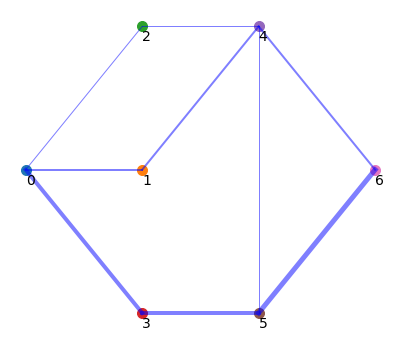

In [4]:
data={'0':(1,2),
       '1':(3,2),
      '2':(3,4),
      '3':(3,0),
      '4':(5,4),
      '5':(5,0),
      '6':(7,2)}
fig = plt.figure(figsize=(7,6))

for i in instance.i:
    #print(data[str(i)],data[str(i)][0],data[str(i)][1])
    plt.scatter(data[str(i)][0],data[str(i)][1],s=100)
    plt.text(data[str(i)][0],data[str(i)][1]-0.2,str(i),fontsize=14)
    
    for j in instance.j:
        if (i!=j):
            if value(instance.distance[i,j]>0.001):
                plt.plot([data[str(i)][0],data[str(j)][0]],[data[str(i)][1],data[str(j)][1]],lw=value(instance.distance[i,j]),color='blue',alpha=0.5)
     
plt.axis('off')

In [5]:
instance.display()

Model unknown

  Variables:
    flow : Size=49, Index=flow_index
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (0, 0) :     0 :  None :   100 : False :  True : NonNegativeReals
        (0, 1) :     0 :   2.0 :   100 : False : False : NonNegativeReals
        (0, 2) :     0 :   1.0 :   100 : False : False : NonNegativeReals
        (0, 3) :     0 :   4.0 :   100 : False : False : NonNegativeReals
        (0, 4) :     0 :   0.0 :   100 : False : False : NonNegativeReals
        (0, 5) :     0 :   0.0 :   100 : False : False : NonNegativeReals
        (0, 6) :     0 :   0.0 :   100 : False : False : NonNegativeReals
        (1, 0) :     0 :   0.0 :   100 : False : False : NonNegativeReals
        (1, 1) :     0 :  None :   100 : False :  True : NonNegativeReals
        (1, 2) :     0 :   0.0 :   100 : False : False : NonNegativeReals
        (1, 3) :     0 :   0.0 :   100 : False : False : NonNegativeReals
        (1, 4) :     0 :   2.0 :   100 : False : False : 